In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from astropy.io import fits
from matplotlib.colors import LogNorm
from google.colab.patches import cv2_imshow
from numpy import log10
from google.colab import drive
import os

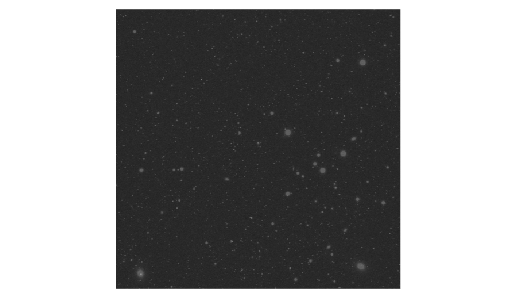

In [ ]:
#Basic Noise Cancelling Procedure
# Load the PNG images
img1 = Image.open('image_calexp-i-682799-R03_S02-2024-10-08T04-image1.png')
img2 = Image.open('image_calexp-i-930407-R33_S00-2025-09-26T05-image2.png')
img3 = Image.open('image_calexp-g-661721-R22_S20-2024-09-06T08_image3.png')
img4 = Image.open('image_calexp-i-679430-R21_S01-2024-10-04T05_image4.png')

# Convert images to NumPy arrays
arr1 = np.array(img1)
arr2 = np.array(img2)
arr3 = np.array(img3)
arr4 = np.array(img4)

# Average the pixel values
average_arr = np.mean([arr1, arr2, arr3, arr4], axis=0).astype(np.uint8)

# Convert the NumPy array back to an image
result_img = Image.fromarray(average_arr)

# Save the result
result_img.save('noise_cancelled_image_average.png')

plt.imshow(result_img, interpolation= "none")
plt.axis('off')  # Hide the axis
plt.show()


In [ ]:
# Convert PNG to grayscale using cv2

# Load the images
img1 = cv2.imread('image_calexp-i-682799-R03_S02-2024-10-08T04-image1.png')  # Reference image
img2 = cv2.imread('image_calexp-i-930407-R33_S00-2025-09-26T05-image2.png')  # Image to align
img3 = cv2.imread('image_calexp-g-661721-R22_S20-2024-09-06T08_image3.png')
img4 = cv2.imread('image_calexp-i-679430-R21_S01-2024-10-04T05_image4.png')
# Convert to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
gray3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
gray4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
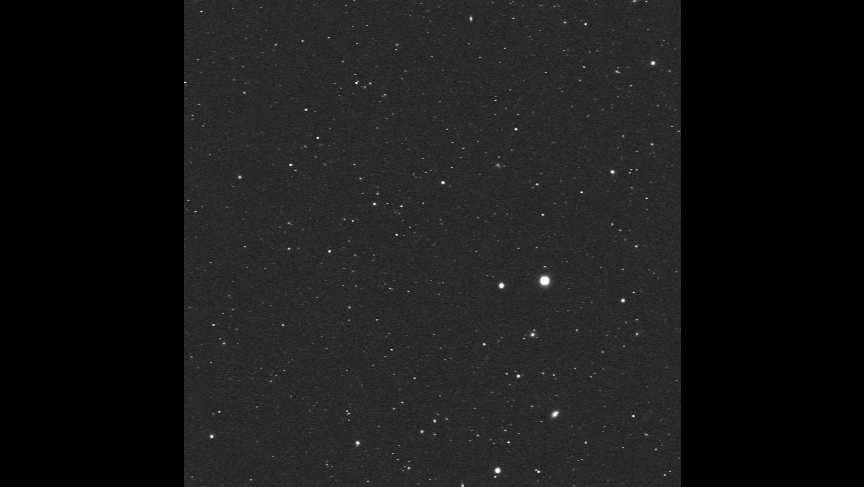

In [ ]:
gray1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
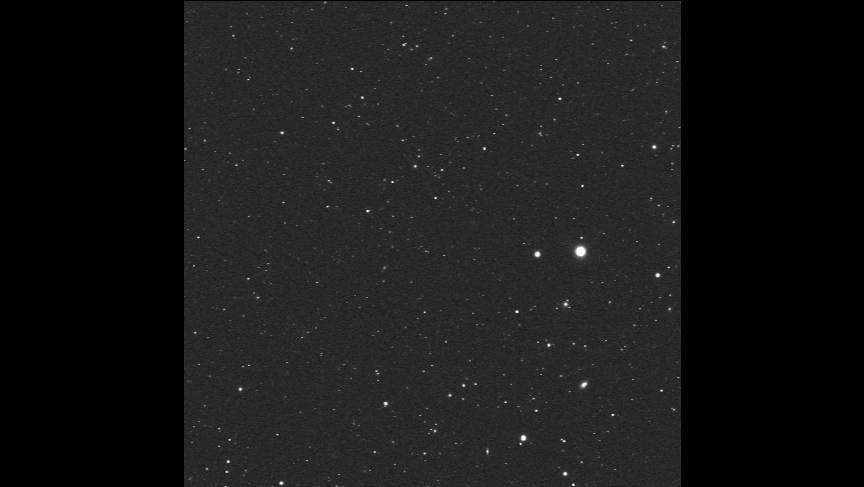

In [ ]:
gray2

In [ ]:
# Working functions for the alignment of matrix B to reference matrix A - a row and a column at a time
# Example matrices A and B
A = np.array([[1, 5, 3], [2, 8, 4], [6, 7, 9]])
B = np.array([[3, 2, 6], [7, 1, 5], [4, 8, 2]])

def align_rows_based_on_max(A, B):
    # Initialize the aligned_B matrix
    alignedrows_B = np.zeros_like(A)

    # Iterate over each row
    for i in range(A.shape[0]):
        # Find index of the max value in the current row of A and B
        max_idx_A = np.argmax(A[i, :])
        max_idx_B = np.argmax(B[i, :])

        # Calculate the shift amount (positive: shift right, negative: shift left)
        shift_amount = max_idx_A - max_idx_B

        # Depending on the shift, place B's row in aligned_B
        if shift_amount > 0:
            # Shift row to the right
            alignedrows_B[i, shift_amount:] = B[i, :B.shape[1] - shift_amount]
        elif shift_amount < 0:
            # Shift row to the left
            alignedrows_B[i, :shift_amount] = B[i, -shift_amount:]
        else: # Added condition for shift_amount == 0
            alignedrows_B[i, :] = B[i, :]

    return alignedrows_B

alignedrows_B = align_rows_based_on_max(A, B)

def align_columns_based_on_max(A, B):
    # Initialize the aligned_B matrix
    alignedcolumns_B = np.zeros_like(A)

    # Iterate over each row
    for i in range(A.shape[1]):
        # Find index of the max value in the current row of A and B
        max_idx_A = np.argmax(A[:, i])
        max_idx_B = np.argmax(B[:, i])

        # Calculate the shift amount (positive: shift down, negative: shift up)
        shift_amount = max_idx_A - max_idx_B

        # Depending on the shift, place B's column in alignedcolumns_B
        if shift_amount > 0:
            # Shift column down
            alignedcolumns_B[shift_amount:, i] = B[:B.shape[0] - shift_amount, i]
        elif shift_amount < 0:
            # Shift column up
            alignedcolumns_B[:shift_amount, i] = B[-shift_amount:, i]
        else: # Added condition for shift_amount == 0
            alignedcolumns_B[:, i] = B[:, i]

    return alignedcolumns_B


alignedcolumns_B = align_columns_based_on_max(A, alignedrows_B)

print("Aligned-rows Matrix B:")
print(alignedrows_B)

print("\nAligned-columns Matrix B:")
print(alignedcolumns_B)

Aligned-rows Matrix B:
[[2 6 0]
 [0 7 1]
 [0 4 8]]

Aligned-columns Matrix B:
[[0 6 0]
 [0 7 1]
 [2 4 8]]


In [ ]:
alignedrows_gray2 = align_rows_based_on_max(gray1, gray2)
fullyaligned_gray2 = align_columns_based_on_max(gray1, alignedrows_gray2)

In [ ]:
np.shape(gray1)

(487, 864)

array([[ 77,  54,  50, ..., 152, 174,  71],
       [ 44,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)
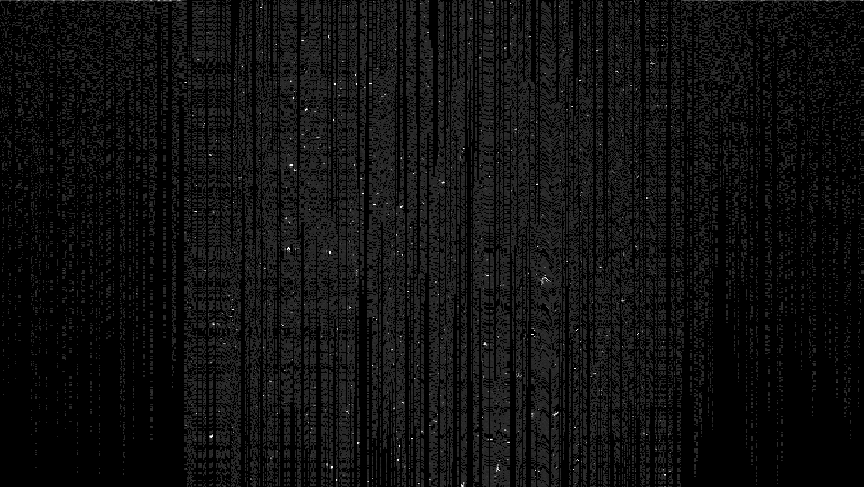

In [ ]:
fullyaligned_gray2
# this doesn't seem to work because you're tearing the image into strips

In [ ]:
# This shifts the entire image B left/right and up/down to match the most intense pixel of image A
import numpy as np

A = np.array([[8, 5, 3, 0], [1, 20, 2, 0], [6, 1, 2, 0]])
B = np.array([[3, 2, 6, 0], [7, 1, 5, 0], [4, 2, 8, 0]])

def align_x(A, B):
    # Initialize the aligned_B matrix
    alignedrows_B = np.zeros_like(A)

  # Convert the flat index to row and column indices
    Ax, Ay = np.unravel_index(np.argmax(A), A.shape)

    Bx, By = np.unravel_index(np.argmax(B), B.shape)

    x_shift = Ay - By

  # Depending on the shift, place B's row in aligned_B
    if x_shift > 0:
      # Shift row to the right
      alignedrows_B[:, x_shift:] = B[:, :B.shape[1] - x_shift]

    elif x_shift < 0:
      # Shift row to the left
      alignedrows_B[:, :B.shape[1] + x_shift] = B[:, -x_shift:]

    else: # Added condition for shift_amount == 0
      alignedrows_B[:, :] = B[:, :]

    return alignedrows_B

#alignedrows_B = align_x(A, B)

def align_y(A, B):
    # Initialize the aligned_B matrix
    aligned_B = np.zeros_like(A)

  # Convert the flat index to row and column indices
    Ax, Ay = np.unravel_index(np.argmax(A), A.shape)

    Bx, By = np.unravel_index(np.argmax(B), B.shape)

    y_shift = Ax - Bx

  # Depending on the shift, place B's row in aligned_B
    if y_shift > 0:
      # Shift row to the right
      aligned_B[y_shift:, :] = B[:B.shape[0] - y_shift, :]

    elif y_shift < 0:
      # Shift row to the left
      aligned_B[:B.shape[0] + y_shift, :] = B[-y_shift:, :]

    else: # Added condition for shift_amount == 0
      aligned_B[:, :] = B[:, :]

    return aligned_B

alignedx_B = align_x(A, B)
aligned_B = align_y(A, alignedx_B)

print(A)
print(B)
print(alignedx_B)
print(aligned_B)

[[ 8  5  3  0]
 [ 1 20  2  0]
 [ 6  1  2  0]]
[[3 2 6 0]
 [7 1 5 0]
 [4 2 8 0]]
[[2 6 0 0]
 [1 5 0 0]
 [2 8 0 0]]
[[1 5 0 0]
 [2 8 0 0]
 [0 0 0 0]]


array([[ 0,  0,  0, ..., 38, 42, 44],
       [ 0,  0,  0, ..., 41, 44, 42],
       [ 0,  0,  0, ..., 39, 46, 41],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)
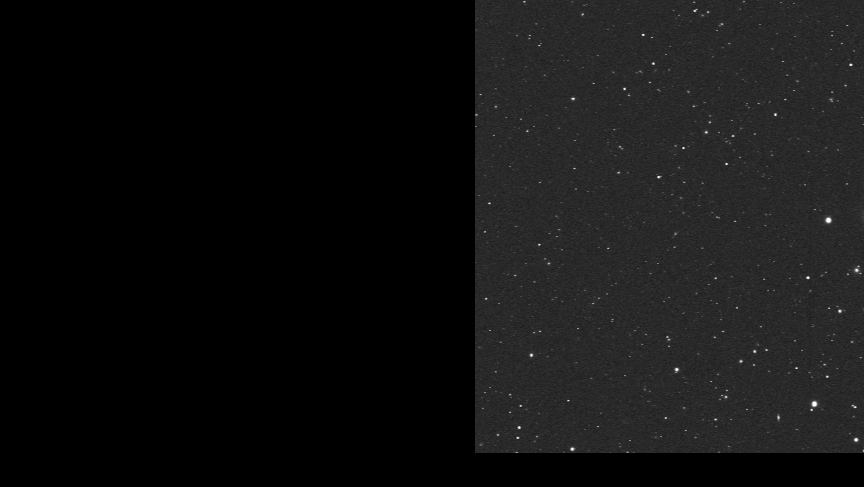

In [ ]:
alignedxgray2 = align_x(gray1, gray2)
alignedygray2 = align_y(gray1, alignedxgray2)

alignedxgray3 = align_x(gray1, gray3)
alignedygray3 = align_y(gray1, alignedxgray3)

alignedxgray4 = align_x(gray1, gray4)
alignedygray4 = align_y(gray1, alignedxgray4)


alignedygray2

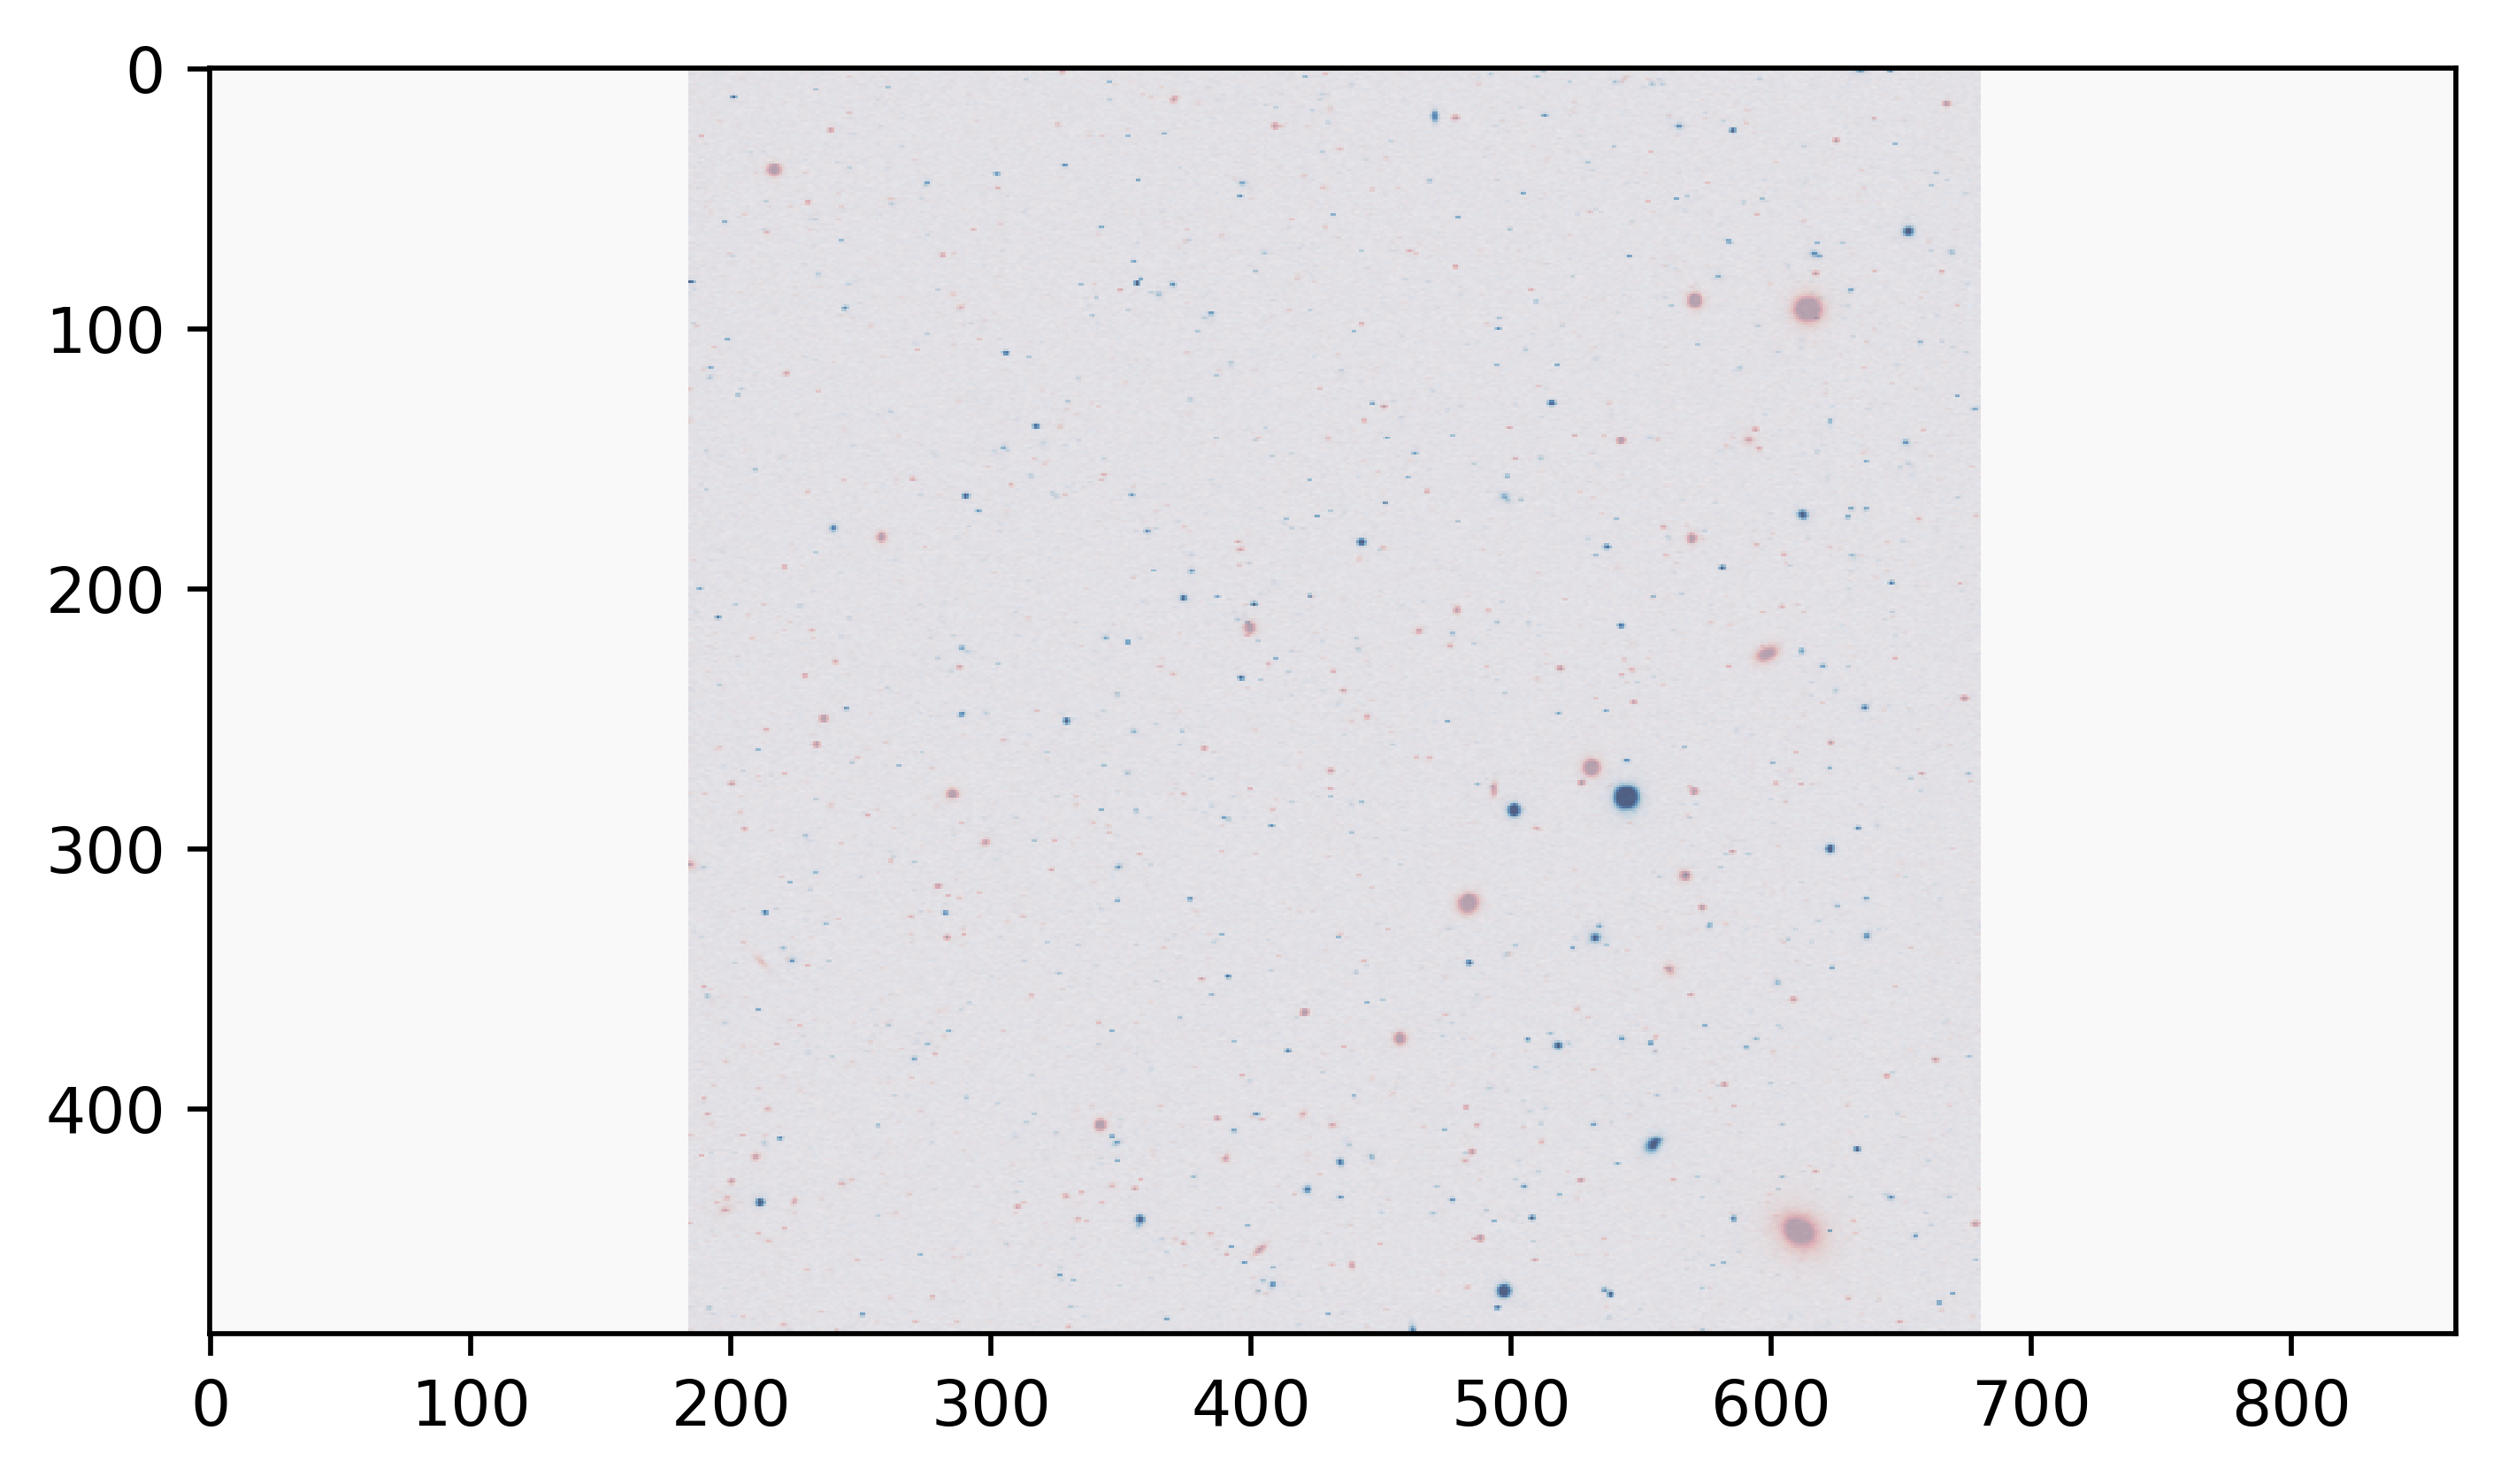

In [ ]:
# Checking alignmnent
plt.figure(dpi = 512)
plt.imshow(arr1[:,:,0], cmap = 'Blues', interpolation = "none")
#plt.imshow(arr2[:,:,0], cmap = 'Reds', alpha = 0.5, interpolation = "none")
plt.imshow(arr3[:,:,0], cmap = 'Reds', alpha = 0.3, interpolation = "none")
#plt.colorbar() # Hide the axis
plt.show()

# We see that images are rotated in relation to each other also

In [ ]:
arr2.shape

(487, 864, 4)

FITS file section


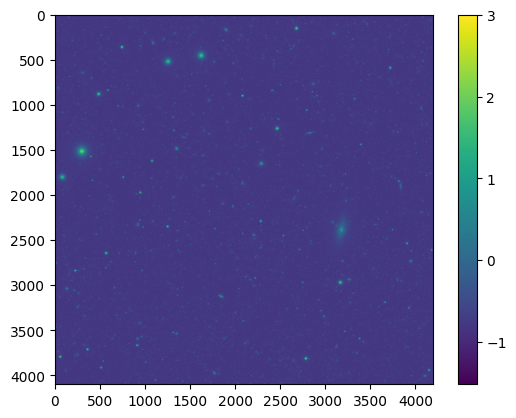

In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits
from numpy import log10

# Load the FITS file
image_file = 'image_deepCoadd_calexp-g-DC2-3831-47-this.fits'
hdulist = fits.open(image_file)

image_data = hdulist[1].data

image_log = log10(image_data - image_data.min() + 0.03)  # make negative values zero then add x to avoid log(0). Adjust x to change the image colour range
plt.imshow(image_log)
plt.colorbar()
plt.show()





In [2]:

hdulist.info()



Filename: image_deepCoadd_calexp-g-DC2-3831-47-this.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  IMAGE         1 PrimaryHDU      25   ()      
  1  IMAGE         1 CompImageHDU     34   (4200, 4100)   float32   
  2  MASK          1 CompImageHDU     48   (4200, 4100)   int32   
  3  VARIANCE      1 CompImageHDU     34   (4200, 4100)   float32   
  4  ARCHIVE_INDEX    1 BinTableHDU     41   16361R x 7C   [1J, 1J, 1J, 1J, 1J, 64A, 64A]   
  5  FilterLabel    1 BinTableHDU     28   1R x 3C   [2X, 32A, 32A]   
  6  SkyWcs        1 BinTableHDU     17   298R x 1C   [1QB(9302)]   
  7  CoaddInputs    1 BinTableHDU     81   67R x 16C   [1J, 1J, 1J, 1J, 1J, 1J, 1J, 1J, 1K, 1J, 1J, 1J, 1J, 1J, 1D, 32A]   
  8  WarpedPsf     1 BinTableHDU     25   67R x 3C   [1J, 1J, 1J]   
  9  PsfexPsf      1 BinTableHDU     52   229R x 9C   [1J, 1J, 1J, 1J, 1J, 1J, 1D, 1D, 1E]   
 10  PsfexPsf      1 BinTableHDU     45   229R x 8C   [2J, 1J, 6D, 6D, 3J, 39366E, 2D, 2D]   
 11  Transf

In [4]:
primary = hdulist[7].header
primary

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  100 / width of table in bytes                        
NAXIS2  =                   67 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   16 / number of fields in each row                   
TTYPE1  = 'wcs     '           / archive ID for Wcs object                      
TFORM1  = '1J      '           / format of field                                
TDOC1   = 'archive ID for Wcs object'                                           
TCCLS1  = 'Scalar  '           / Field template used by lsst.afw.table          
TTYPE2  = 'psf     '        

In [ ]:
coadd_inputs = primary['HIERARCH COADD_INPUTS_ID']
coadd_inputs

3

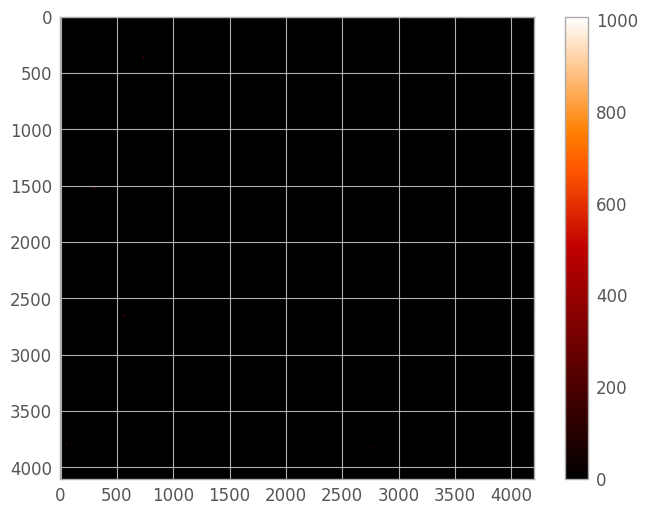

In [ ]:
from astropy.visualization import astropy_mpl_style

plt.style.use(astropy_mpl_style)
plt.figure()
plt.imshow(image_data)
plt.colorbar()
plt.show()



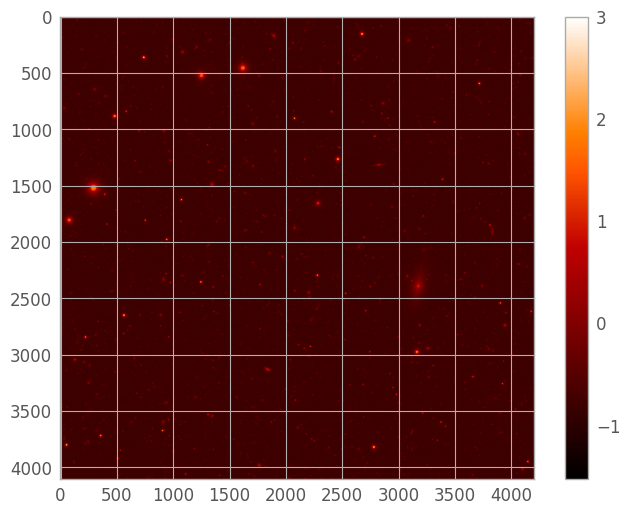

In [ ]:
from numpy import log10

image_log = log10(image_data - image_data.min() + 0.03)  # make negative values zero then add x to avoid log(0). Adjust x to change the image colour range

plt.style.use(astropy_mpl_style)
plt.figure()
plt.imshow(image_log)
plt.colorbar()
plt.show()

# try vmin and vmax


Can only see something when log transforming data in the FITs file. Realised LSST allows you to rotate the image so that EQJ 2000 North is up. So I have downloaded rotated PNGs and hopefully these are easier to stack together.

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the three PNG images
img1 = Image.open('image_calexp-i-518056-R10_S00-2024-01-29T03.png')
img2 = Image.open('image_calexp-i-518092-R02_S00-2024-01-29T04.png')
img3 = Image.open('image_calexp-i-518092-R02_S01-2024-01-29T04.png')
img4 = Image.open('image_calexp-i-518092-R02_S10-2024-01-29T04.png')

# Convert images to NumPy arrays
arr1 = np.array(img1)
arr2 = np.array(img2)
arr3 = np.array(img3)
arr4 = np.array(img4)

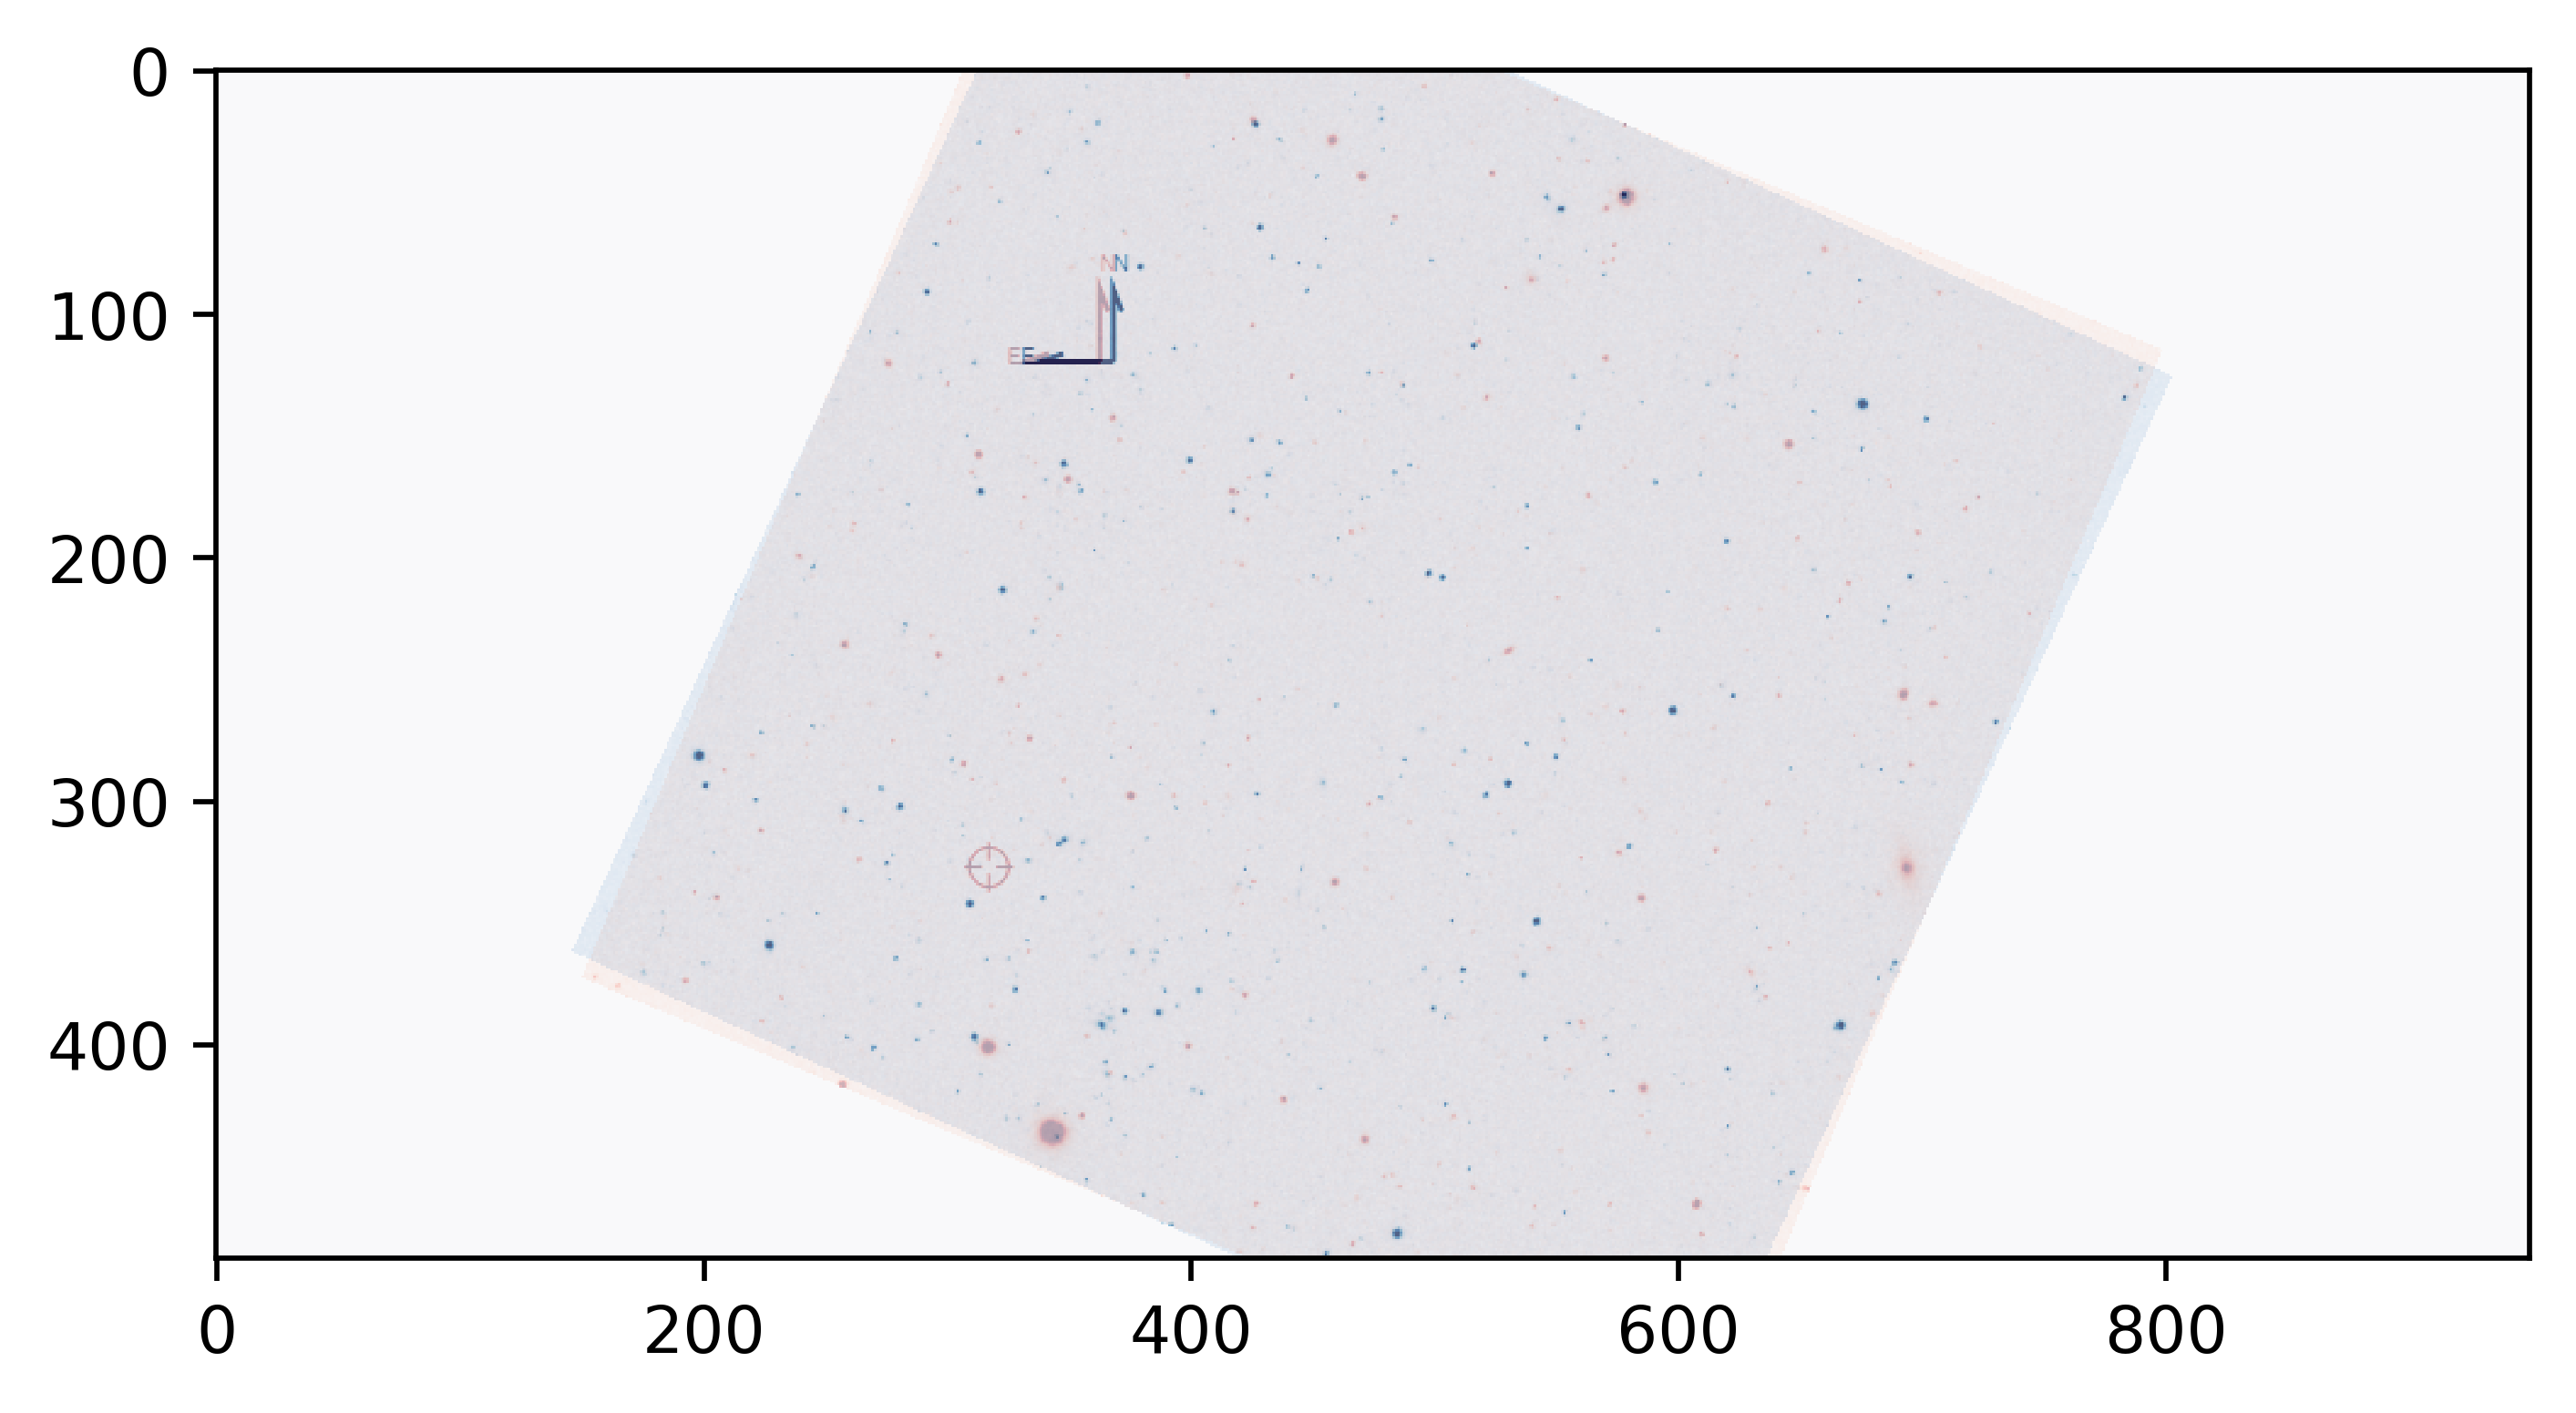

In [ ]:
# Checking alignmnent
plt.figure(dpi = 512)
plt.imshow(arr1[:,:,0], cmap = 'Blues', interpolation = "none")

plt.imshow(arr2[:,:,0], cmap = 'Reds', alpha = 0.3, interpolation = "none")

plt.show()

# Show all the images are rotated to orient in the same direction but actually it seems difficult to get overlapping images of the same section

So now I have taken rotated PNG images that overlap so that they contain the centre of the simulation: (61.722095,-35.761440). They are all rotated so that EQ J2000 North is up (Equatorial Coordinate System). Each image has a FOV of 0.356 degrees (21.36 arcminutes)

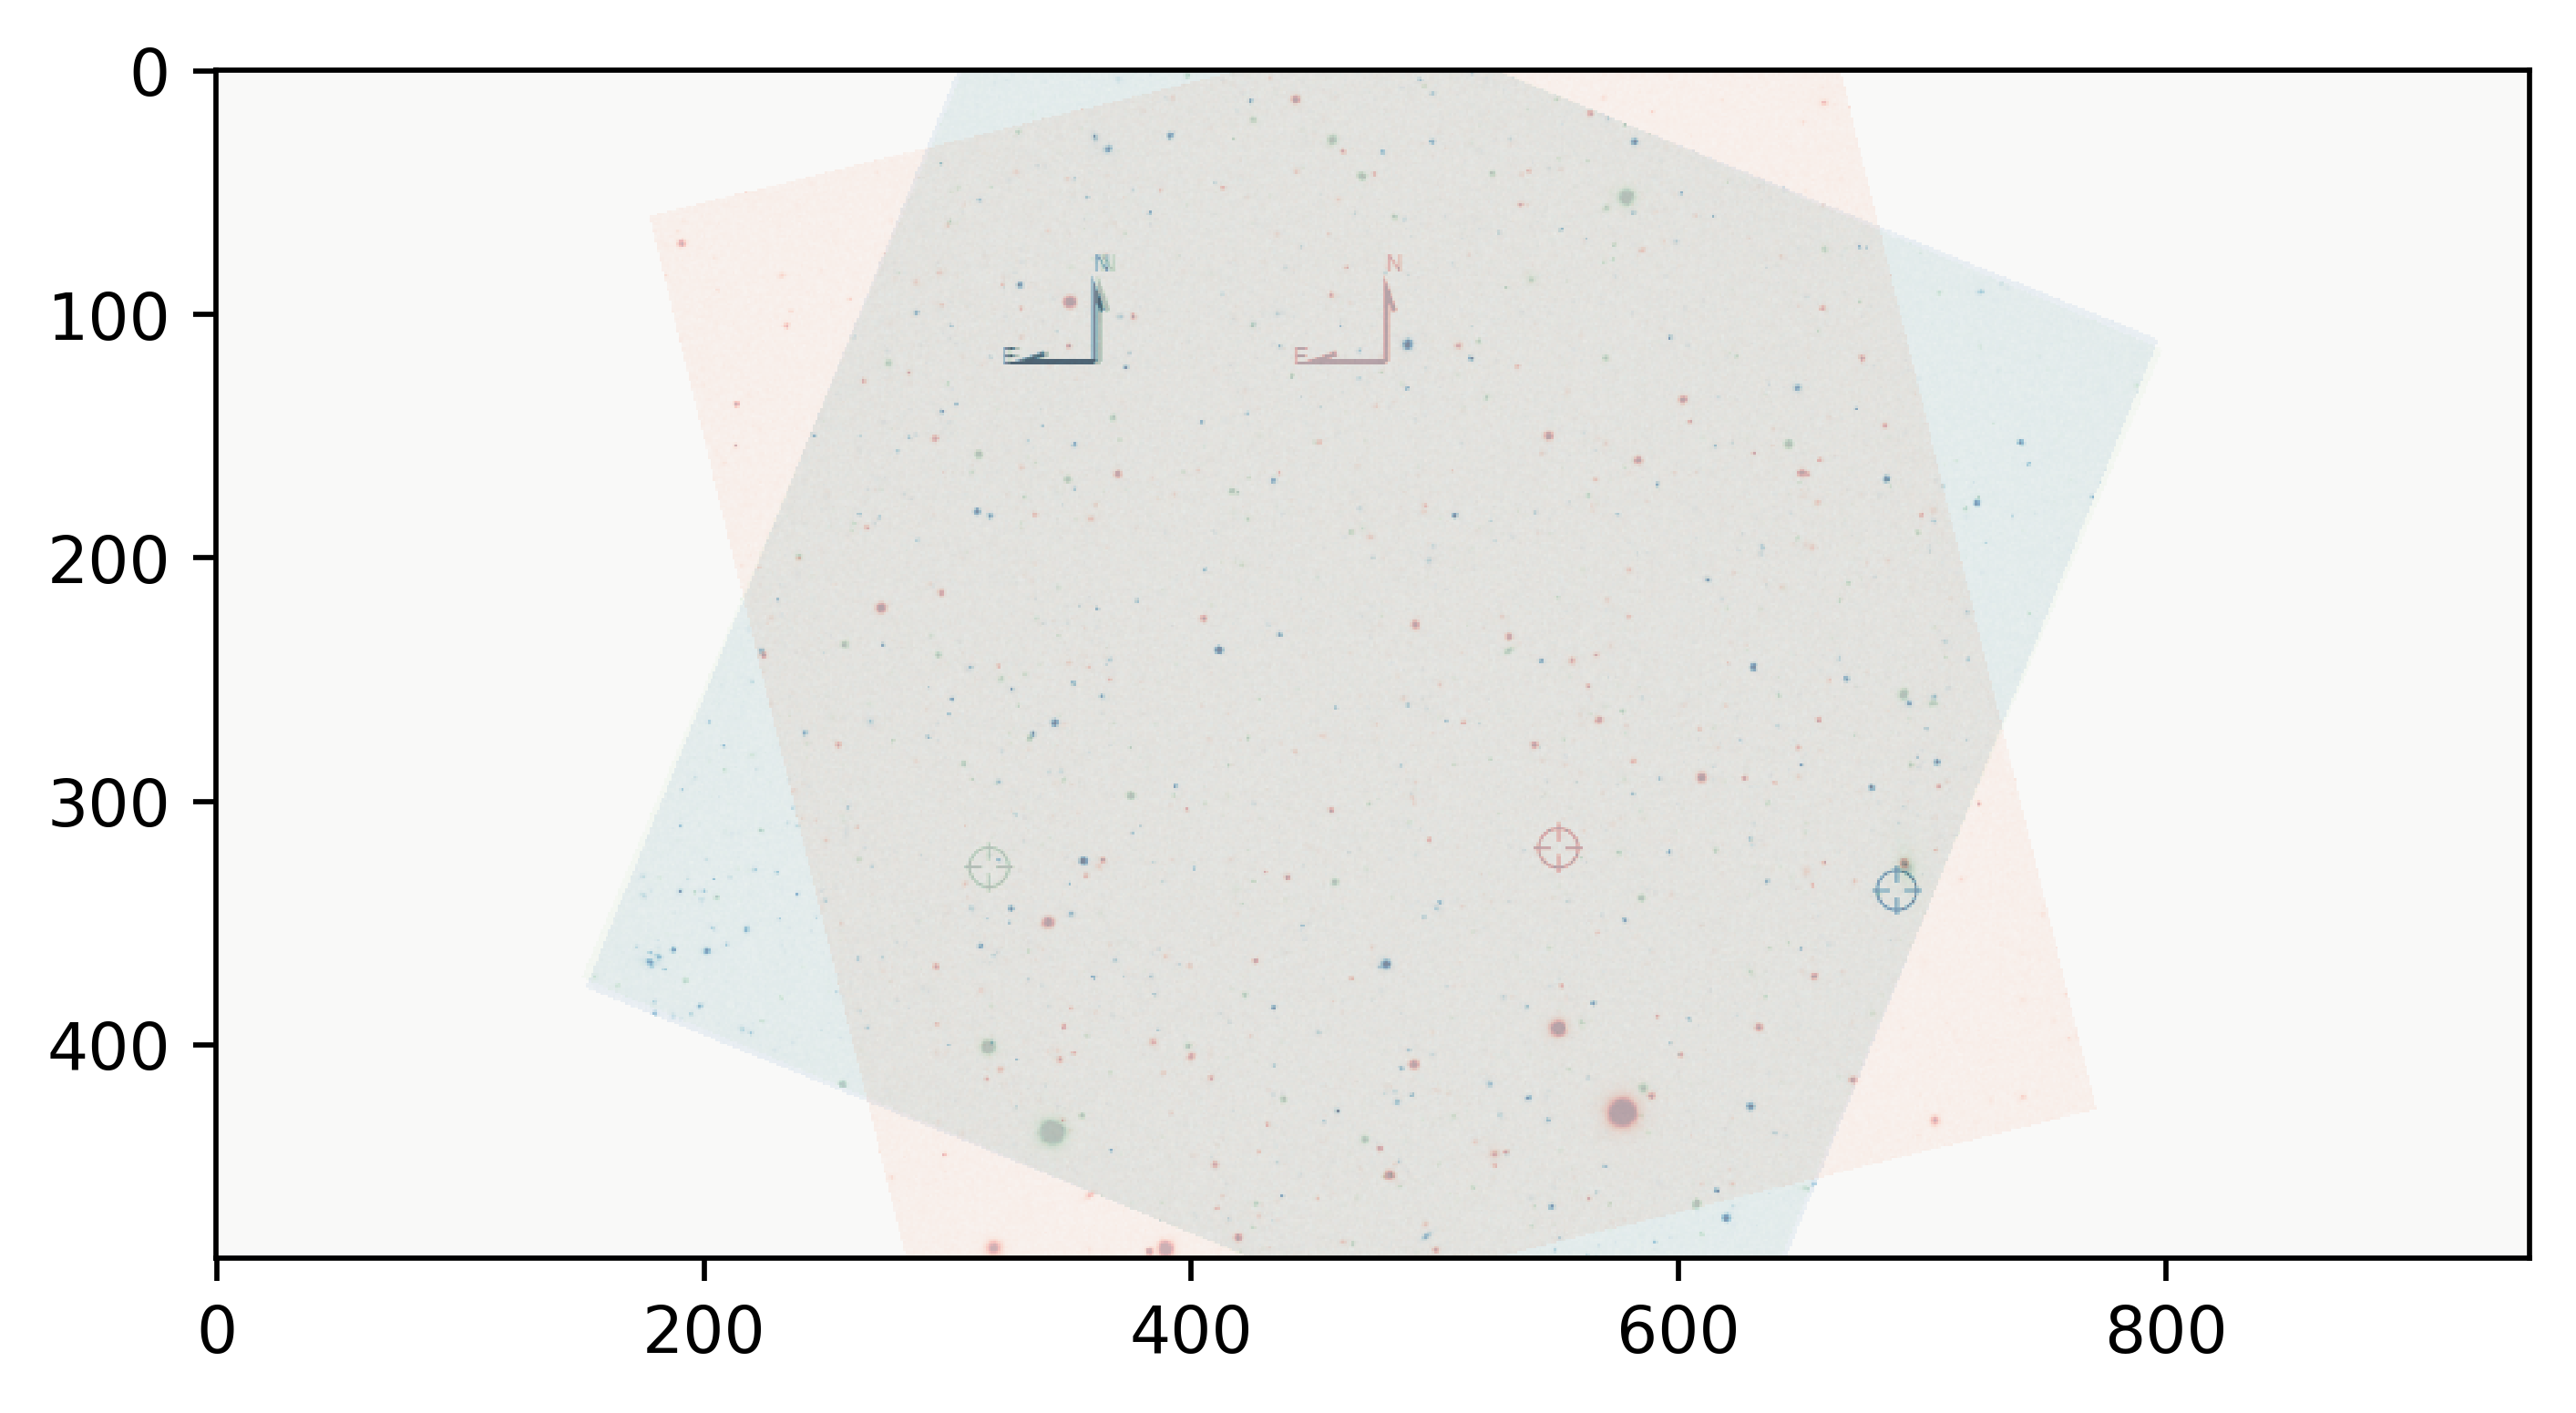

In [ ]:
img1 = Image.open('image_calexp-i-518030-R31_S02-2024-01-29T03.png')
img2 = Image.open('image_calexp-i-518092-R02_S00-2024-01-29T04.png')
img3 = Image.open('image_calexp-z-516377-R23_S10-2024-01-27T01.png')

arr1 = np.array(img1)
arr2 = np.array(img2)
arr3 = np.array(img3)

plt.figure(dpi=512)
plt.imshow(arr1[:,:,0], cmap = 'Blues', interpolation = "none")
plt.imshow(arr2[:,:,0], cmap = 'Greens', alpha = 0.3, interpolation = "none")
plt.imshow(arr3[:,:,0], cmap = 'Reds', alpha = 0.3, interpolation = "none")

plt.show()

Next things to try:
1. Just get the whole simulation off LSST
2. Align to a target within LSST - just do the noise cancellation in Python

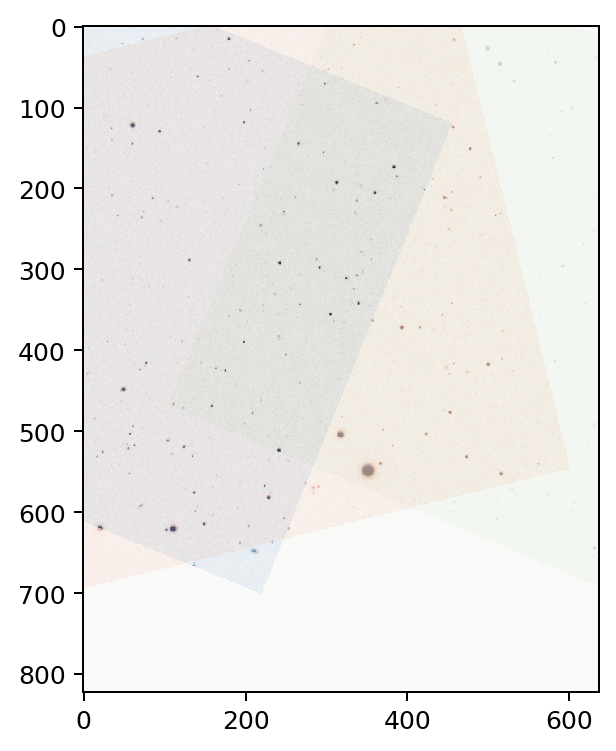

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the three PNG images
img1 = Image.open('image_calexp-i-518030-R31_S02-2024-01-29T03.png')
img2 = Image.open('image_calexp-i-518092-R02_S00-2024-01-29T04.png')
img3 = Image.open('image_calexp-z-516377-R23_S10-2024-01-27T01 (1).png')


# Convert images to NumPy arrays
arr1 = np.array(img1)
arr2 = np.array(img2)
arr3 = np.array(img3)

plt.figure(dpi=180)
plt.imshow(arr1[:,:,0], cmap = 'Blues', interpolation = "none")
plt.imshow(arr2[:,:,0], cmap = 'Greens', alpha = 0.3, interpolation = "none")
plt.imshow(arr3[:,:,0], cmap = 'Reds', alpha = 0.3, interpolation = "none")

plt.show()



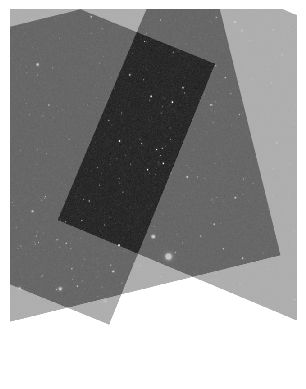

In [ ]:
# Average the pixel values
average_arr = np.mean([arr1, arr2, arr3], axis=0).astype(np.uint8)

# Convert the NumPy array back to an image
result_img = Image.fromarray(average_arr)

# Save the result
result_img.save('noise_cancelled_image_average.png')

plt.imshow(result_img, interpolation= "none")
plt.axis('off')  # Hide the axis
plt.show()

The overlapping region is approximately 4.65 arcminutes in width and 8.85 arcminutes in height. In the next section I am making anything outside the overlapping region transparent for each of the 3 images.

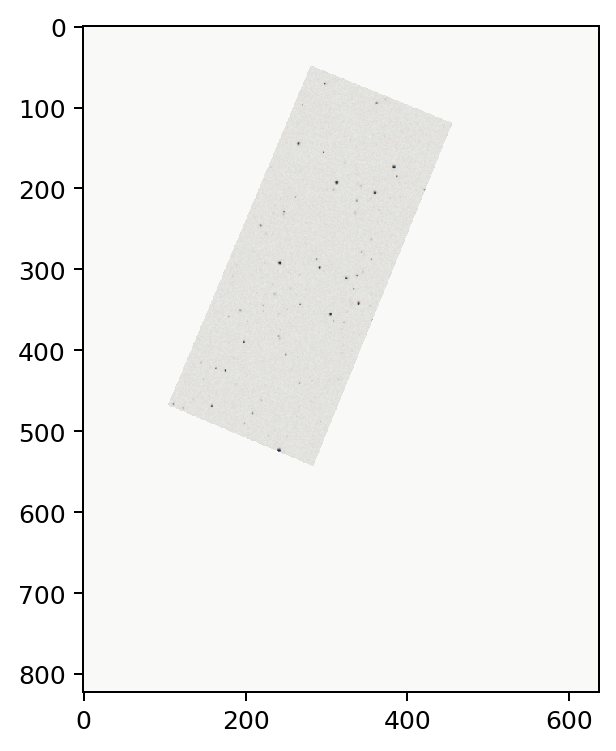

In [ ]:
# Extract the alpha channels [all rows, all columns, 4th component of each element]. Each element R,G,B,Alpha (transparency)
alpha1 = arr1[:, :, 3]
alpha2 = arr2[:, :, 3]
alpha3 = arr3[:, :, 3]

# Create a mask that only keeps the areas where all images are fully opaque. 2D true/false array
overlap_mask = (alpha1 > 0) & (alpha2 > 0) & (alpha3 > 0)

# [all rows, all columns, all components of each element]. overlap_mask[:, :, np.newaxis] creates a new dimension to overlap mask so that the true/false can be multiplied to each channel.
arr1_overlap = arr1[:, :, :] * overlap_mask[:, :, np.newaxis]
arr2_overlap = arr2[:, :, :] * overlap_mask[:, :, np.newaxis]
arr3_overlap = arr3[:, :, :] * overlap_mask[:, :, np.newaxis]
# makes anything outside the overlapping boundary zero

plt.figure(dpi=180)
plt.imshow(arr1_overlap[:, :, 0], cmap='Blues', interpolation='none')
plt.imshow(arr2_overlap[:, :, 0], cmap='Greens', alpha=0.3, interpolation='none')
plt.imshow(arr3_overlap[:, :, 0], cmap='Reds', alpha=0.3, interpolation='none')

plt.show()


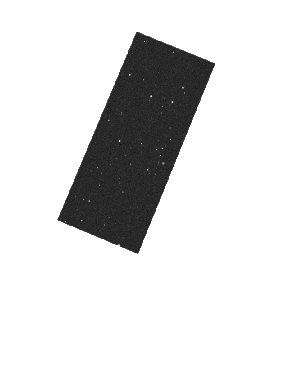

In [ ]:
# Here I noise-cancel the overlapping region. Outside regions are transparent
average_region = np.mean([arr1_overlap, arr2_overlap, arr3_overlap], axis=0).astype(np.uint8)

noisecancelled_img = Image.fromarray(average_region)

noisecancelled_img.save('noise_cancelled_overlapping_region2.png')

plt.imshow(noisecancelled_img, interpolation="none")
plt.axis('off')  # Hide the axis
plt.show()

In the next section I am going to try to crop the image but the rotation complicates things.
I will first try to rotate the image, then crop it.

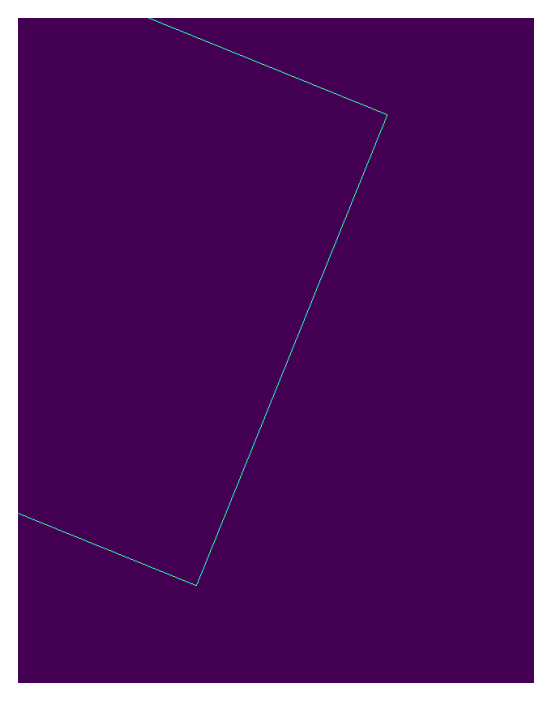

In [ ]:
# Use edge detection to define the area and find the angle of rotation

import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('image_calexp-i-518030-R31_S02-2024-01-29T03.png', cv2.IMREAD_UNCHANGED)


alpha_channel = image[:, :, 3]

_, alpha_binary = cv2.threshold(alpha_channel, 1, 255, cv2.THRESH_BINARY)

# Apply Canny edge detection to the binary alpha mask
edges = cv2.Canny(alpha_binary, 0, 1)

plt.figure(dpi=180)
plt.imshow(edges)
plt.axis('off')
plt.show()


In [ ]:
# Create a mask where True indicates that at least one of the components is non-zero
non_zero_mask = np.any(arr3_overlap != 0, axis=2)



In this next section I am examining the FITS file in more detail to see why I can't visualize the image.

In [ ]:
# Load the FITS file
image_file1 = 'image_calexp-r-638856-R02_S20-2024-08-09T08.fits'
hdulist = fits.open(image_file)

# metadata about file structure
hdulist.info()


Filename: image_calexp-r-638856-R02_S20-2024-08-09T08.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  IMAGE         1 PrimaryHDU     135   ()      
  1  IMAGE         1 CompImageHDU     64   (4072, 4000)   float32   
  2  MASK          1 CompImageHDU     74   (4072, 4000)   int32   
  3  VARIANCE      1 CompImageHDU     64   (4072, 4000)   float32   
  4  ARCHIVE_INDEX    1 BinTableHDU     41   452R x 7C   [1J, 1J, 1J, 1J, 1J, 64A, 64A]   
  5  FilterLabel    1 BinTableHDU     28   1R x 3C   [2X, 32A, 32A]   
  6  Detector      1 BinTableHDU    106   1R x 20C   [1QA(7), 1J, 1J, 1QA(17), 1J, 1J, 1J, 1J, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1J, 1QE(256), 1QA(3)]   
  7  TransformMap    1 BinTableHDU     33   379R x 5C   [1QA(10), 1QA(7), 1QA(10), 1QA(7), 1J]   
  8  ExposureSummaryStats    1 BinTableHDU     18   380R x 1C   [1QB(2523)]   
  9  Detector      1 BinTableHDU    200   16R x 38C   [3X, 1QA(3), 1J, 1J, 1J, 1J, 1D, 1D, 1D, 1D, 1J, 1QD(2), 1QA(12), 1J, 1J, 

In [ ]:
image1 = hdulist[1].data

print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(4000, 4072)


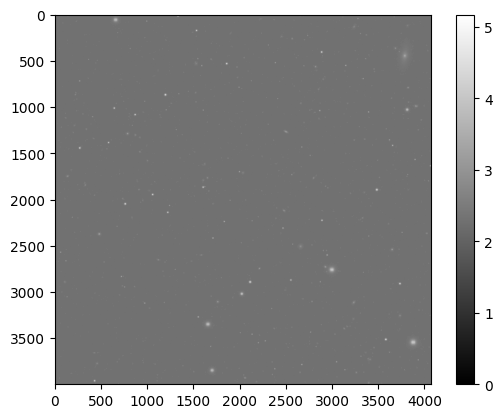

In [ ]:
image1_log = log10(image1 - image1.min() + 1)  # make negative values zero then add 1 to avoid log(0).
plt.imshow(image1_log, cmap='gray')
plt.colorbar()
plt.show()

In [ ]:
image_file2 = 'image_calexp-i-518092-R02_S00-2024-01-29T04.fits'
hdulist2 = fits.open(image_file2)
image2 = hdulist2[1].data
image2_log = log10(image2 - image2.min() + 1)

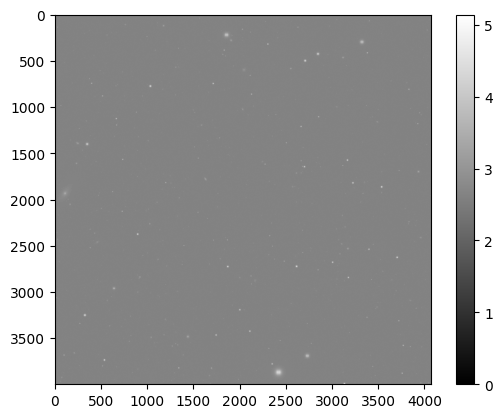

In [ ]:
plt.imshow(image2_log, cmap='gray')
plt.colorbar()
plt.show()

In [ ]:
image_file3 = 'image_calexp-r-638962-R23_S01-2024-08-09T09.fits'
hdulist3 = fits.open(image_file3)
image3 = hdulist3[1].data
image3_log = log10(image3 - image3.min() + 1)

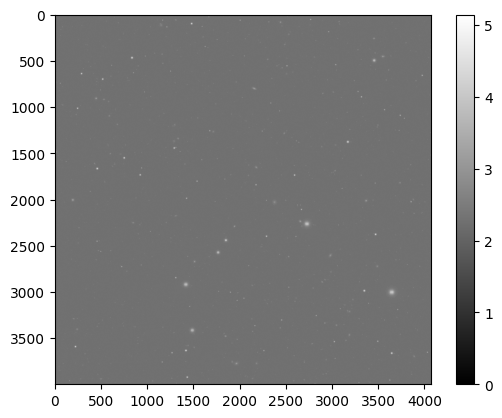

In [ ]:
plt.imshow(image3_log, cmap='gray')
plt.colorbar()
plt.show()

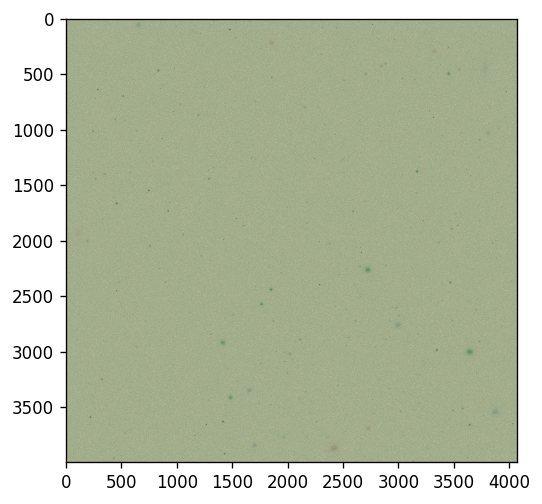

In [ ]:
plt.figure(dpi=120)
plt.imshow(image1_log, cmap = 'Blues', interpolation = "none")
plt.imshow(image2_log, cmap = 'Reds', alpha = 0.5, interpolation = "none")
plt.imshow(image3_log, cmap = 'Greens', alpha = 0.5, interpolation = "none")

Turns out log transforming the data does work for visualization - you just need to manually ensure that you deal with the negative values. The FITS image is not rotated or centred on the correct coordinates however.

In this next section I am going to noise cancel the 20 stacked PNG images.

In [ ]:
# Function to turn all the PNGs in my folder into numpy arrays
def png_to_numpy(folder_path):
    # Dictionary to store image names and arrays
    image_arrays = {}

    # Loop through all files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.png'):  # Check if the file is a PNG
            # Construct full file path
            file_path = os.path.join(folder_path, filename)

            # Open the image file
            img = Image.open(file_path)

            # Convert the image to a NumPy array
            img_array = np.array(img)

            # Store the NumPy array in the dictionary with filename as key
            image_arrays[filename] = img_array

    return image_arrays


In [ ]:
LSSTimages = '/content/drive/MyDrive/PHYS3888 ISP B/LSST PNG images'

image_arrays = png_to_numpy(LSSTimages)

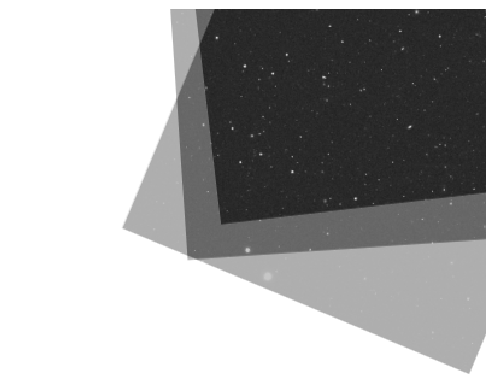

In [ ]:
# Perform the noise cancellation for 3 images to test logic of code

# Convert the dictionary values (image arrays) to a list
image_list = list(image_arrays.values())

# Stack the images into a single NumPy array
image_stack = np.stack(image_list, axis=0) # Stack along a new axis (axis=0)

# Calculate the average along the stacked axis (axis=0)
average_arr = np.mean(image_stack, axis=0).astype(np.uint8)

# Convert the NumPy array back to an image
result_img = Image.fromarray(average_arr)

# Save the result
result_img.save('noise_cancelled_3images.png')

plt.imshow(result_img, interpolation= "none")
plt.axis('off')  # Hide the axis
plt.show()

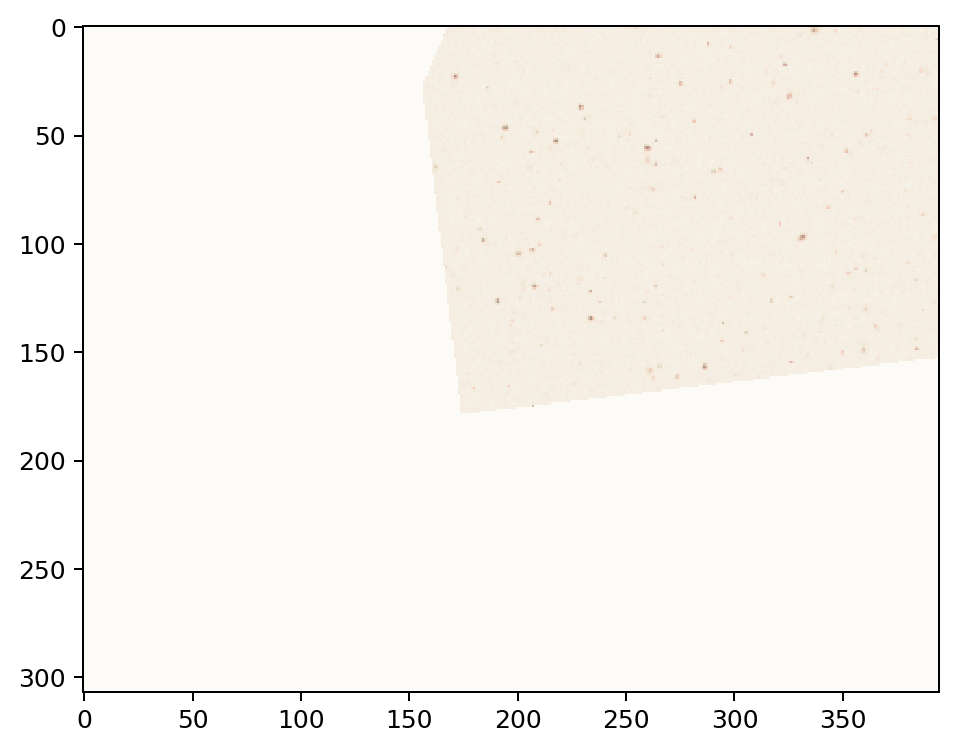

In [ ]:
# Manually perform the transparency for the un-overlapped regions to compare against the function

alpha1 = image_list[0][:, :, 3]
alpha2 = image_list[1][:, :, 3]
alpha3 = image_list[2][:, :, 3]

# Create a mask that only keeps the areas where all images are fully opaque. 2D true/false array
overlap_mask = (alpha1 > 0) & (alpha2 > 0) & (alpha3 > 0)

# [all rows, all columns, all components of each element]. overlap_mask[:, :, np.newaxis] creates a new dimension to overlap mask so that the true/false can be multiplied to each channel.
arr1_overlap = image_list[0][:, :, :] * overlap_mask[:, :, np.newaxis]
arr2_overlap = image_list[1][:, :, :] * overlap_mask[:, :, np.newaxis]
arr3_overlap = image_list[2][:, :, :] * overlap_mask[:, :, np.newaxis]
# makes anything outside the overlapping boundary zero

plt.figure(dpi=180)
#plt.imshow(arr1_overlap[:, :, 0], cmap='Blues', interpolation='none')
plt.imshow(arr2_overlap[:, :, 0], cmap='Greens', alpha=0.3, interpolation='none')
plt.imshow(arr3_overlap[:, :, 0], cmap='Reds', alpha=0.3, interpolation='none')

plt.show()

In [ ]:
# Function to take only the overlapping region for all the images in the stack and make everything outside it transparent

def apply_overlap_mask(image_arrays):
    # Get the list of image arrays
    arrays = list(image_arrays.values())

    # Extract the alpha channel from each image (4th channel, index 3)
    alpha_channels = [arr[:, :, 3] for arr in arrays]

    # Create an overlap mask: areas where all alpha channels are non-zero
    overlap_mask = np.ones_like(alpha_channels[0], dtype=bool)
    for alpha in alpha_channels:
        overlap_mask &= (alpha > 0)  # Update the mask where all images are non-zero

    # Create new arrays where anything outside the overlap mask is set to zero
    overlapped_images = []
    for arr in arrays:
        arr_overlap = arr * overlap_mask[:, :, np.newaxis]  # Apply mask to all color channels
        overlapped_images.append(arr_overlap)

    return overlapped_images, overlap_mask


In [ ]:

overlapped_images, overlap_mask = apply_overlap_mask(image_arrays)


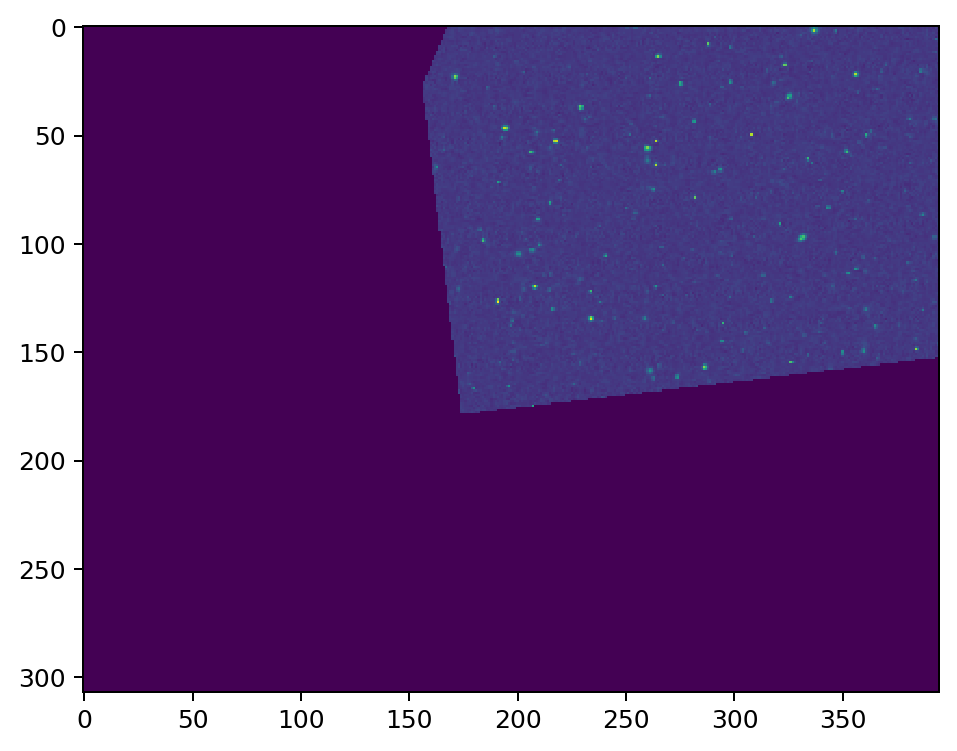

In [ ]:
# Manually show the noise-cancelled overlapped region

plt.figure(dpi=180)

plt.imshow(overlapped_images[0][:, :, 0],  interpolation='none')
plt.imshow(overlapped_images[1][:, :, 0], interpolation='none')
plt.imshow(overlapped_images[2][:, :, 0], interpolation='none')
plt.show()

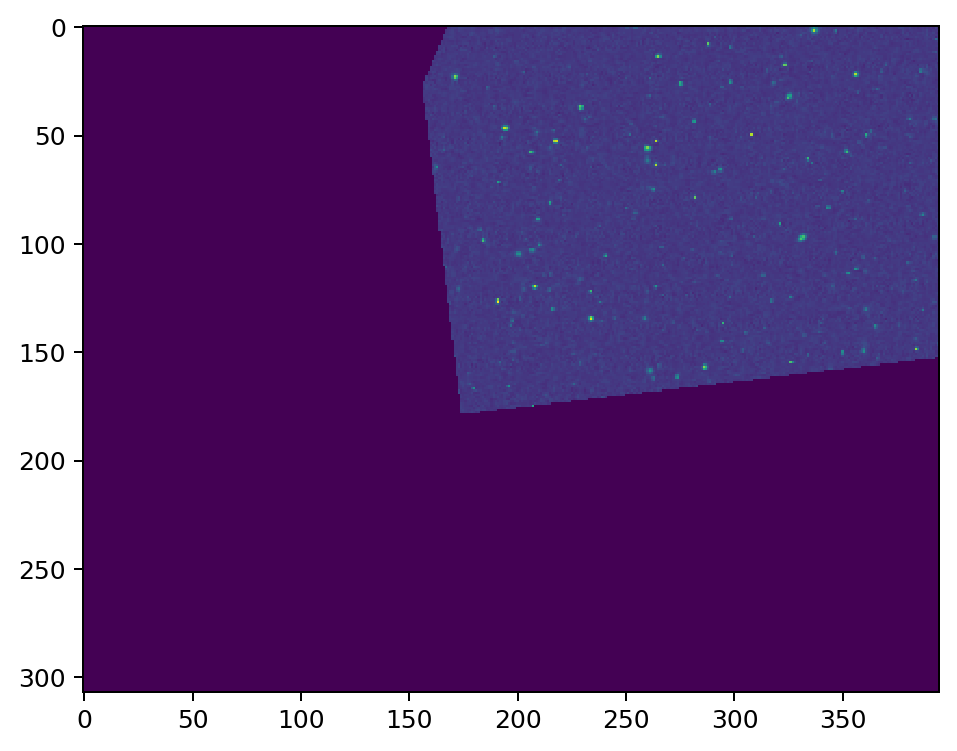

In [ ]:
# Use a for loop here to plot 3 stacked overlapping regions to verify the logic.

plt.figure(dpi=180)
# Loop through each image in the overlapped_images list and display the Red channel
for i, img in enumerate(overlapped_images):
    plt.imshow(img[:, :, 0], interpolation='none')


plt.show()


I have verified the image stacking and noise cancellation functions above for 3 PNG images. In the next section I am going to use the functions on ten images.

In [ ]:
LSSTimages = '/content/drive/MyDrive/PHYS3888 ISP B/LSST PNG images'

image_arrays = png_to_numpy(LSSTimages)

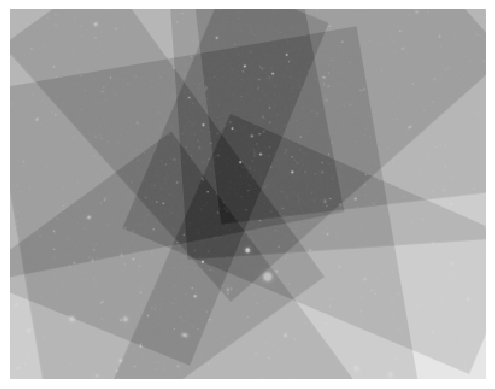

In [ ]:
# Perform the noise cancellation for 10 images

# Convert the dictionary values (image arrays) to a list
image_list = list(image_arrays.values())

# Stack the images into a single NumPy array
image_stack = np.stack(image_list, axis=0) # Stack along a new axis (axis=0)

# Calculate the average along the stacked axis (axis=0)
average_arr = np.mean(image_stack, axis=0).astype(np.uint8)

# Convert the NumPy array back to an image
result_img = Image.fromarray(average_arr)

# Save the result
result_img.save('noise_cancelled_10images.png')

plt.imshow(result_img, interpolation= "none")
plt.axis('off')  # Hide the axis
plt.show()

In [ ]:
# Apply overlap mask function to 10 images

overlapped_images, overlap_mask = apply_overlap_mask(image_arrays)

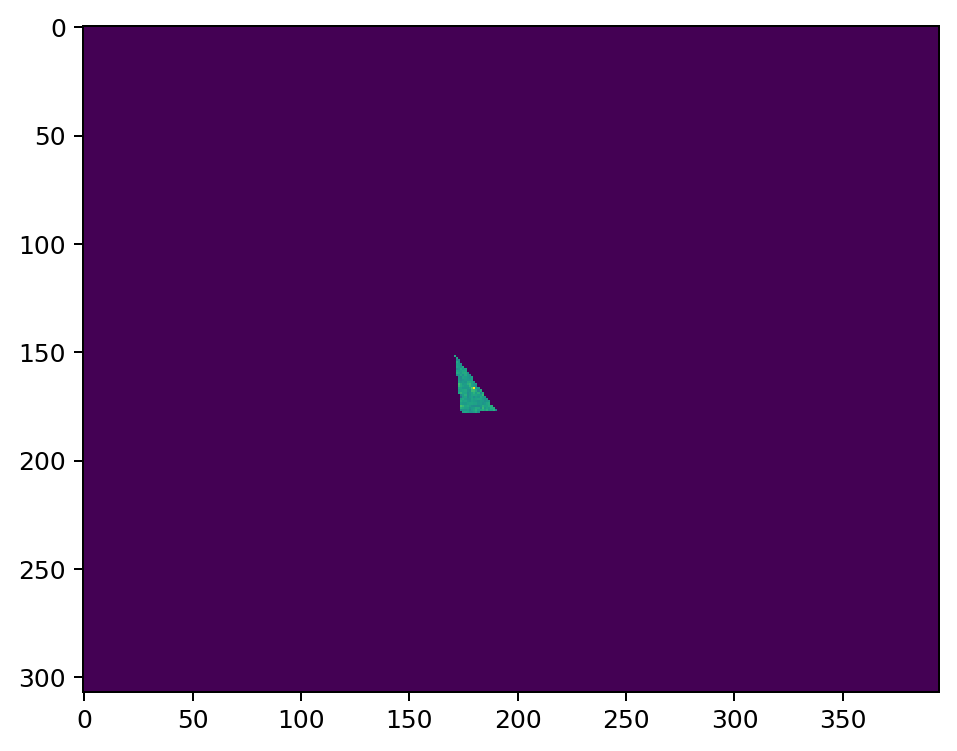

In [ ]:
# Show the overlapped region for 10 images

plt.figure(dpi=180)
# Loop through each image in the overlapped_images list and display the Red channel
for i, img in enumerate(overlapped_images):
    plt.imshow(img[:, :, 0], interpolation='none')


plt.show()

With 10 images, the overlapping region is very small. With 20 images, there is no overlapping region (not shown).

Summary:

1. FITs files for PVIs lose orientation using EQ J2000 North and centering on desired coordinates (they look normal with log transform - just need to not take logs of zeroes and negative numbers!)
2. FITs files for raw images splits up a single image into 15 strips and there is also no orientation or centering.
3. 20 images covering a common centre coordinate is over an 8 month period (a query of 6 months gives 7 images so images don't seem to be produced at regular intervals).
4. Stacking more images decreases the common overlapping region. Performed with 3 images, 10, and then 20.
5. For some reason, how you view the image in DP0.2 affects the image quality you can download (the max png quality seems to be 2398x1051, FITS image is 4072x4000)
6. Is a single PVI or coadd/Deepcoadd image (already a combination of multiple input images) good enough without us further noise cancelling it? (coadds/deepcoadds  have bad pixels, artifacts, and transient and variable object flux removed prior to combination. Coadds are stored with the non-astrophysical background already subtracted.)

This last section I am noise cancelling 5 higher quality PNG images that overlap the bes (share the largest common area)

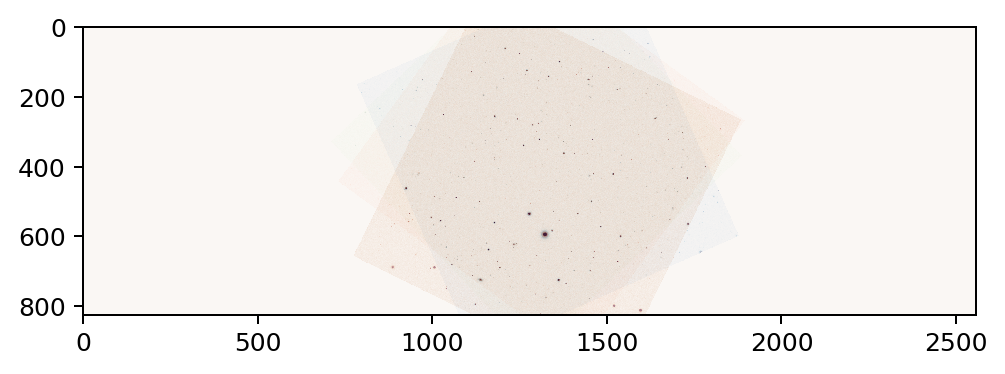

In [ ]:
# Load the three PNG images
img1 = Image.open('image_calexp-r-468294-R24_S10-2023-11-15T02.png')
img2 = Image.open('image_calexp-u-911698-R33_S01-2025-08-20T09.png')
img3 = Image.open('image_calexp-y-458311-R24_S12-2023-10-25T03.png')
img4 = Image.open('image_calexp-y-646740-R32_S21-2024-08-18T09.png')
img5 = Image.open('image_calexp-y-646740-R32_S21-2024-08-18T09.png')

# Convert images to NumPy arrays
arr1 = np.array(img1)
arr2 = np.array(img2)
arr3 = np.array(img3)
arr4 = np.array(img4)
arr5 = np.array(img5)

plt.figure(dpi=180)
plt.imshow(arr1[:,:,0], cmap = 'Blues', interpolation = "none")
plt.imshow(arr2[:,:,0], cmap = 'Greens', alpha = 0.3, interpolation = "none")
plt.imshow(arr3[:,:,0], cmap = 'Reds', alpha = 0.3, interpolation = "none")
plt.imshow(arr4[:,:,0], cmap = 'Purples', alpha = 0.3, interpolation = "none")
plt.imshow(arr5[:,:,0], cmap = 'Oranges', alpha = 0.3, interpolation = "none")

plt.show()


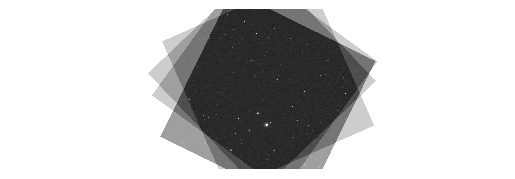

In [ ]:
# Average the pixel values
average_arr = np.mean([arr1, arr2, arr3, arr4, arr5], axis=0).astype(np.uint8)

# Convert the NumPy array back to an image
result_img = Image.fromarray(average_arr)

# Save the result
result_img.save('noise_cancelled_5_images.png')

plt.imshow(result_img, interpolation= "none")
plt.axis('off')  # Hide the axis
plt.show()

In [ ]:
result_img.size

(2558, 824)

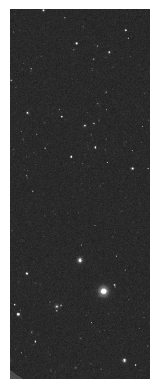

In [ ]:
# Get image dimensions
width, height = result_img.size

# Calculate the coordinates for the middle 500x500 crop
left = (width - 265) // 2
top = (height - 700) // 2
right = left + 265
bottom = top + 700

# Crop the image
cropped_img = result_img.crop((left, top, right, bottom))

# Save the cropped result
cropped_img.save('cropped_imagetest.png')

# Display the cropped image
plt.imshow(cropped_img, interpolation="none")
plt.axis('off')  # Hide the axis
plt.show()

In [ ]:
cropped_img.size

(1000, 1000)